In [1]:
import pickle

with open('ty_dataframes.pkl', 'rb') as file:
    data = pickle.load(file)

ty_full = data['ty_full']
ty_dropped = data['ty_dropped']


with open('yk_dataframes.pkl', 'rb') as file:
    data = pickle.load(file)

yk_full = data['yk_full']
yk_dropped = data['yk_dropped']

In [2]:
import pandas as pd 

df_full = pd.concat([yk_full, ty_full], axis=0)
df_full

,Name,Target,Target_Encoded,Distribution Type,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,...,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
0,temperature,Other,0,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
1,Device_Test_Time,Outlier/Longtail,1,longtail,1.830048e-16,0.252373,1.000007,0.443438,-6.338681,49.533672,...,0.079063,46.533672,0.687064,-5.402994,1197,69577,0.310838,0.000000,0.398593,7.040191e-157
2,Part_Id,Outlier/Longtail,1,longtail,1.045742e-16,-0.129072,1.000007,1.597451,0.435881,-0.729177,...,0.016112,-3.729177,2.352655,-1.418352,0,0,0.076701,0.000000,0.955334,3.218504e-84
3,g2bist_efuse_blank_read_f_:Functional[1],Other,0,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
4,tdf_50k_2_f_:Functional[1],Other,0,functional,-5.551115e-17,-0.577350,1.154701,0.577350,0.000000,0.000000,...,0.250000,-3.000000,1.662769,-0.577350,0,4,0.468149,0.249377,0.629776,1.240726e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,f_nvm_programXxXPgmPatrepairinfo2M1YvhsYvhsYyY...,Other,0,functional,1.660147e-16,-0.162416,1.000390,0.000000,0.000000,0.000000,...,0.025701,-3.000000,6.157036,-0.162416,33,1284,0.538810,0.000000,0.142840,4.190848e-60
1398,f_nvm_readifrXxXVfyPatrepairinfo2M1YvhsYvhsYyY...,Other,0,functional,1.660147e-16,-0.162416,1.000390,0.000000,0.000000,0.000000,...,0.025701,-3.000000,6.157036,-0.162416,33,1284,0.538810,0.000000,0.142840,4.190848e-60
1399,f_nvm_XxXRdoutPatrepairinfo3M1YvhsYvhsYyYYy_1....,Other,0,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
1400,f_nvm_readifrXxXVfyPatrepairinfo3M1YvhsYvhsYyY...,Other,0,functional,-2.293553e-18,0.839089,1.000161,2.030858,0.000000,0.000000,...,0.000000,-3.000000,0.839089,-1.191769,0,0,0.386121,0.000000,0.625566,1.923310e-63


In [ ]:
#df_full.isnull().sum()

In [5]:
df_full_filled = df_full.fillna(0)

In [6]:
from sklearn.model_selection import train_test_split

columns_to_drop = ['Target', 'Name', 'Distribution Type', 'Target_Encoded']
X = df_full_filled.drop(columns = columns_to_drop)
y = df_full_filled['Target_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [35]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9629629629629629
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       335
           1       0.93      0.95      0.94       151

    accuracy                           0.96       486
   macro avg       0.96      0.96      0.96       486
weighted avg       0.96      0.96      0.96       486



# Checking if dataset is balanced

In [9]:
y.value_counts()

0    1729
1     698
Name: Target_Encoded, dtype: int64

# Conduct oversampling to balance dataset

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [11]:
y_train_smote.value_counts()

0    1394
1    1394
Name: Target_Encoded, dtype: int64

In [77]:
model_smote = RandomForestClassifier() # class_weight={0: 1, 1: 10}
model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_smote.predict(X_test)
#y_pred_smote_adjusted = (model_smote.predict_proba(X_test)[:, 1] >= f1_threshold).astype(int) # f1_threshold calculated below

In [78]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

Accuracy: 0.9629629629629629
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       335
           1       0.93      0.95      0.94       151

    accuracy                           0.96       486
   macro avg       0.95      0.96      0.96       486
weighted avg       0.96      0.96      0.96       486



In [79]:
import pickle

with open('combined_smote_model.pkl', 'wb') as file:
    pickle.dump(model_smote, file)

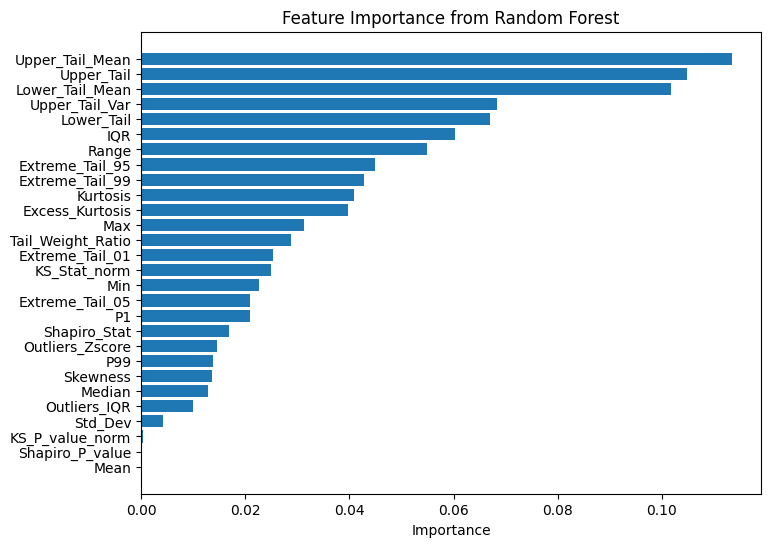

In [48]:
import pandas as pd
import matplotlib as plt

importances = model_smote.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# Adjusting decision threshold to improve recall

In [49]:
from sklearn.metrics import precision_recall_curve
import numpy as np

y_probs = model_smote.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# best threshold for recall
recall_idx = np.argmax(recalls)
recall_threshold = thresholds[recall_idx]

# best threshld for f1 score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
f1_idx = np.argmax(f1_scores)
f1_threshold = thresholds[f1_idx]

y_pred_new_threshold = (y_probs >= f1_threshold).astype(int)


print("Optimizing recall for positive class")
print("Accuracy:", accuracy_score(y_test, y_pred_new_threshold))
print("Classification Report:\n", classification_report(y_test, y_pred_new_threshold))

y_pred_new_threshold = (y_probs >= recall_threshold).astype(int)

print("Optimizing f1 score for positive class")
print("Accuracy:", accuracy_score(y_test, y_pred_new_threshold))
print("Classification Report:\n", classification_report(y_test, y_pred_new_threshold))

Optimizing recall for positive class
Accuracy: 0.9711934156378601
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       335
           1       0.97      0.94      0.95       151

    accuracy                           0.97       486
   macro avg       0.97      0.96      0.97       486
weighted avg       0.97      0.97      0.97       486

Optimizing f1 score for positive class
Accuracy: 0.8209876543209876
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.74      0.85       335
           1       0.63      1.00      0.78       151

    accuracy                           0.82       486
   macro avg       0.82      0.87      0.81       486
weighted avg       0.89      0.82      0.83       486



In [50]:
X_train.columns

Index(['Mean', 'Median', 'Std_Dev', 'IQR', 'Skewness', 'Kurtosis', 'Min',
       'Max', 'Range', 'Upper_Tail', 'Lower_Tail', 'Extreme_Tail_95',
       'Extreme_Tail_99', 'Extreme_Tail_05', 'Extreme_Tail_01',
       'Upper_Tail_Mean', 'Upper_Tail_Var', 'Lower_Tail_Mean',
       'Tail_Weight_Ratio', 'Excess_Kurtosis', 'P99', 'P1', 'Outliers_Zscore',
       'Outliers_IQR', 'KS_Stat_norm', 'KS_P_value_norm', 'Shapiro_Stat',
       'Shapiro_P_value'],
      dtype='object')

# Gradient Boosting
Performs better without using resampled data

In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.9609053497942387
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       335
           1       0.95      0.93      0.94       151

    accuracy                           0.96       486
   macro avg       0.96      0.95      0.95       486
weighted avg       0.96      0.96      0.96       486



# Hyperparameter tuning
Does not improve (don't use)

In [56]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 10, 50]
}

xgb_clf = xgb.XGBClassifier()

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 10, 'subsample': 0.8}


In [57]:
xgb_model = XGBClassifier(**grid_search.best_params_)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Accuracy: 0.9609053497942387
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       335
           1       0.93      0.95      0.94       151

    accuracy                           0.96       486
   macro avg       0.95      0.96      0.95       486
weighted avg       0.96      0.96      0.96       486



# Support Vector Machine

In [58]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42, class_weight='balanced')
svm_model.fit(X_train_smote, y_train_smote)
svm_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

Accuracy: 0.6358024691358025
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.50      0.65       335
           1       0.46      0.94      0.62       151

    accuracy                           0.64       486
   macro avg       0.70      0.72      0.63       486
weighted avg       0.80      0.64      0.64       486



# Stacked Model

In [59]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
svm_model = SVC(probability=True)

meta_model = LogisticRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_meta_features = np.zeros((X_train_smote.shape[0], 3)) 
test_meta_features = np.zeros((X_test.shape[0], 3))

for i, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    X_tr, X_val = X_train_smote.iloc[train_idx], X_train_smote.iloc[val_idx]
    y_tr, y_val = y_train_smote.iloc[train_idx], y_train_smote.iloc[val_idx]

    # Train and predict with Random Forest
    rf_model.fit(X_tr, y_tr)
    train_meta_features[val_idx, 0] = rf_model.predict(X_val)
    test_meta_features[:, 0] += rf_model.predict(X_test) / kf.n_splits

    # Train and predict with XGBoost
    xgb_model.fit(X_tr, y_tr)
    train_meta_features[val_idx, 1] = xgb_model.predict(X_val)
    test_meta_features[:, 1] += xgb_model.predict(X_test) / kf.n_splits

    # Train and predict with SVM
    svm_model.fit(X_tr, y_tr)
    train_meta_features[val_idx, 2] = svm_model.predict(X_val)
    test_meta_features[:, 2] += svm_model.predict(X_test) / kf.n_splits

# Train the meta-model on the predictions
meta_model.fit(train_meta_features, y_train_smote)

# Make final predictions with the meta-model
final_predictions = meta_model.predict(test_meta_features)

print("Accuracy:", accuracy_score(y_test, final_predictions))
print("Classification Report:\n", classification_report(y_test, final_predictions))

Accuracy: 0.9670781893004116
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       335
           1       0.93      0.97      0.95       151

    accuracy                           0.97       486
   macro avg       0.96      0.97      0.96       486
weighted avg       0.97      0.97      0.97       486



# Investigating (+) unrecalled points in stacked model (in comparison to recalled points)
The unrecalled class has significantly less outliers (especially those determined using IQR).  
The unrecalled class has significantly higher shapiro stat, indicating it is closer to normality.  
-> the one unrecalled outlier class has slightly lower shapiro stat, indicating that outlier deviates abit more from normality as compared to the longtail (understandably because longtail are closer to normality due to presence of tail)
The unrecalled class has slightly shorter tail on both ends.

In [60]:
# for positive class (outlier/longtail)
unrecalled_mask = (y_test == 1) & (final_predictions != 1)
unrecalled_points = X_test[unrecalled_mask]

recalled_mask = (y_test == 1) & (final_predictions == 1)
recalled_points = X_test[recalled_mask]

# for negative class (other distributions)
negative_mask = (y_test == 0) & (final_predictions == 0)
negative_points = X_test[negative_mask]

In [61]:
df_full_filled.iloc[unrecalled_points.index]

,Name,Target,Target_Encoded,Distribution Type,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,...,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
282,io18_pspd_high_post_:dc_ioleakage@ATEST2[1],Outlier/Longtail,1,longtail,-1.258062e-13,-0.222386,1.000008,1.545837,0.430965,-0.705670,...,0.020572,-3.705670,2.250954,-1.706390,36,0,0.102874,0.0,0.964651,1.441808e-77
246,cont_pmu_m100uA_pre_:cont_pmu_m100uA@GPIO9[1],Outlier/Longtail,1,outlier,1.078576e-16,-0.303532,1.000007,0.848898,1.165650,0.103775,...,0.187057,-2.896225,2.375115,-1.209387,0,0,0.208949,0.0,0.827233,3.559761e-119
654,rfu_rx_gstep_5925_B_:int_lpf_18db@2G5GTR_B[1],Outlier/Longtail,1,longtail,3.199058e-14,0.229233,1.000008,1.627097,-0.420517,-0.895908,...,0.006060,-3.895908,1.656790,-2.136653,1,0,0.093547,0.0,0.954188,1.247802e-83
291,io18_pspd_high_pre_:dc_ioleakage@ATEST3[1],Outlier/Longtail,1,longtail,-4.661601e-14,0.212111,1.000007,1.600258,-0.133514,-0.913551,...,0.000781,-3.913551,1.930906,-1.921566,2,0,0.095988,0.0,0.964246,5.994412e-79
289,io18_pspd_high_pre_:dc_ioleakage@ATEST1[1],Outlier/Longtail,1,longtail,-1.111313e-13,-0.058764,1.000007,1.268141,0.354691,-0.191540,...,0.089119,-3.191540,2.398259,-1.960975,27,0,0.077159,0.0,0.979158,3.902359e-67


In [74]:
df_full_filled.iloc[negative_points.index]

,Name,Target,Target_Encoded,Distribution Type,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,...,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
519,rfu_rx_gstep_2412_A_:rmgxgm_max@2G5GTR_A[1],Other,0,bimodal,4.310724e-13,-0.100166,1.000008,1.698622,0.129740,-1.031687,...,0.001159,-4.031687,2.010547,-1.847005,0,0,0.076904,0.000000e+00,0.970002,5.117730e-74
892,usb2_hs_min:Functional[1],Other,0,functional,1.580898e-16,-0.009514,1.000008,0.000000,0.000000,0.000000,...,0.000091,-3.000000,-0.009514,-0.009514,6,66289,0.503705,0.000000e+00,0.001447,2.975960e-172
960,psu_enable_buck_rw_:Functional[1],Other,0,functional,-5.268986e-15,-0.009546,1.000008,0.000000,0.000000,0.000000,...,0.000091,-3.000000,-0.009546,-0.009546,6,65847,0.503717,0.000000e+00,0.001455,4.728214e-172
197,cont_pmu_ana1_m100uA_pre_:cont_pmu_m100uA@PCIE...,Outlier/Longtail,1,outlier,1.862799e-15,-0.016948,1.000007,0.245086,-124.935170,16169.469284,...,0.050362,16166.469284,0.484287,-0.353946,4,69437,0.354855,0.000000e+00,0.046316,4.408572e-172
120,f_bfXmod.POWER_NVM_x_x_x__NFC-LDO-JTAGDFT,Other,0,functional,-8.028328e-18,0.041810,1.000006,0.000000,0.000000,0.000000,...,0.001745,-3.000000,0.041810,0.041810,139,79654,0.514930,0.000000e+00,0.018008,3.715945e-177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,a_clk_SE_x_x_tSE-ROSC-PRETRIM_,Other,0,normal,-2.230091e-18,-0.019410,1.000006,0.000003,51.498870,2650.133668,...,0.047141,2647.133668,-0.019405,-0.019417,30,79654,0.507350,0.000000e+00,0.004965,1.303962e-177
1020,tdf_90k_5_p_:Functional[1],Other,0,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.000000,0.000000,0.000000,0,0,0.000000,0.000000e+00,0.000000,0.000000e+00
866,rfu_tx_pmax_5925_AB_:LOLeakage_dBc@2G5GTR_A[1],Outlier/Longtail,1,longtail,9.078937e-14,-0.124989,1.000008,1.238205,1.067007,3.513550,...,0.057113,0.513550,2.980284,-1.803145,626,0,0.056275,7.145311e-180,0.953669,8.502346e-84
795,rfu_rx_ros_5925_:rx_idd18@V18[1],Other,0,bimodal,-5.093505e-14,-0.297756,1.000008,1.276404,0.908833,0.213059,...,0.108009,-2.786941,2.566347,-1.636997,48,0,0.134488,0.000000e+00,0.921029,6.497007e-97


In [71]:
negative_points.describe()

,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,Upper_Tail,...,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
count,3.240000e+02,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,3.240000e+02,324.000000,3.240000e+02
mean,1.867860e-08,0.002737,0.753133,0.262955,19.398075,4138.993010,-8.581094,26.481585,35.062679,0.342357,...,0.019138,4135.993010,0.697782,-0.812502,310.413580,44265.027778,0.310340,9.632191e-14,0.204074,3.129799e-15
std,3.362146e-07,0.128363,0.431910,0.543403,60.908682,16217.745510,19.483730,68.808951,68.597301,1.264910,...,0.041287,16217.745510,1.474741,1.880113,595.743287,39393.528698,0.235075,1.718704e-12,0.353192,5.633132e-14
min,-1.492624e-12,-0.807573,0.000000,0.000000,-10.356309,-1.365035,-282.228631,0.000000,0.000000,0.000000,...,0.000000,-4.365035,-0.099122,-9.859869,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,-5.173812e-18,-0.018631,1.000006,0.000000,0.000000,0.000000,-10.658803,0.011516,2.042103,0.000000,...,0.000000,-3.000000,0.000000,-0.908025,0.000000,0.000000,0.015614,0.000000e+00,0.000259,8.963525e-178
50%,0.000000e+00,0.000000,1.000006,0.000000,0.000000,0.000000,-2.391785,0.095674,9.970514,0.000000,...,0.003377,-3.000000,0.040509,0.000000,75.500000,79654.000000,0.498937,0.000000e+00,0.017420,3.559021e-177
75%,1.208709e-17,0.041241,1.000006,0.000000,0.478108,0.258733,-0.003543,4.747711,25.188066,0.004270,...,0.012283,-2.741267,0.395574,0.023701,419.500000,79654.000000,0.514810,0.000000e+00,0.127167,9.565757e-172
max,6.051863e-06,0.839089,1.006645,2.235088,282.225086,79648.999561,0.000000,282.228631,282.232176,9.412201,...,0.327494,79645.999561,9.303703,0.098409,3841.000000,79783.000000,0.540822,3.093653e-11,0.998677,1.013964e-12


In [70]:
unrecalled_points.describe()

,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,Upper_Tail,...,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
count,5.000000e+00,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.0,5.000000,5.000000e+00
mean,-5.029101e-14,-0.028668,1.000007e+00,1.378046,0.279455,-0.520579,-2.584489,3.731723,6.316212,0.367800,...,0.060718,-3.520579,2.122405,-1.786994,13.200000,0.0,0.115703,0.0,0.937895,7.804717e-68
std,6.842495e-14,0.244167,2.403392e-07,0.328495,0.607137,0.454874,0.108387,0.721990,0.808829,0.125053,...,0.078993,0.454874,0.320137,0.357340,17.020576,0.0,0.052973,0.0,0.062499,1.745188e-67
min,-1.258062e-13,-0.303532,1.000007e+00,0.848898,-0.420517,-0.913551,-2.753563,2.836662,5.351693,0.246377,...,0.000781,-3.913551,1.656790,-2.136653,0.000000,0.0,0.077159,0.0,0.827233,3.559761e-119
25%,-1.111313e-13,-0.222386,1.000007e+00,1.268141,-0.133514,-0.895908,-2.633892,3.113164,5.618870,0.296344,...,0.006060,-3.895908,1.930906,-1.960975,1.000000,0.0,0.093547,0.0,0.954188,1.247802e-83
50%,-4.661601e-14,-0.058764,1.000007e+00,1.545837,0.354691,-0.705670,-2.515030,4.064583,6.578837,0.308632,...,0.020572,-3.705670,2.250954,-1.921566,2.000000,0.0,0.095988,0.0,0.964246,5.994412e-79
75%,1.078576e-16,0.212111,1.000008e+00,1.600258,0.430965,-0.191540,-2.514254,4.105959,6.739851,0.432834,...,0.089119,-3.191540,2.375115,-1.706390,27.000000,0.0,0.102874,0.0,0.964651,1.441808e-77
max,3.199058e-14,0.229233,1.000008e+00,1.627097,1.165650,0.103775,-2.505706,4.538247,7.291810,0.554812,...,0.187057,-2.896225,2.398259,-1.209387,36.000000,0.0,0.208949,0.0,0.979158,3.902359e-67


In [69]:
recalled_points.describe()

,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,Upper_Tail,...,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
count,1.460000e+02,146.000000,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,1.460000e+02,146.000000,1.460000e+02
mean,-1.560621e-14,-0.030443,1.000007e+00,0.992854,-0.135161,4035.477396,-32.878614,27.729844,60.608458,0.518112,...,0.053563,4032.477396,1.714275,-1.684603,277.719178,18276.739726,0.156477,1.416474e-02,0.675459,2.598484e-04
std,7.288282e-13,0.154420,5.564717e-07,0.536410,55.957918,9678.702980,46.009728,53.248983,65.521814,0.363728,...,0.044892,9678.702980,0.896738,0.974072,453.056573,32181.817949,0.170082,9.561667e-02,0.381872,3.029423e-03
min,-6.394272e-12,-0.745631,1.000006e+00,0.000000,-170.866417,-1.035110,-198.429891,0.508693,4.156151,0.000000,...,0.000092,-4.035110,-0.068492,-5.076522,1.000000,0.000000,0.001785,0.000000e+00,0.000774,9.783936e-178
25%,-1.232518e-13,-0.053583,1.000007e+00,0.613538,-3.716157,0.644669,-47.201736,3.826906,11.483148,0.187317,...,0.032296,-2.355331,1.043611,-2.276258,41.250000,0.000000,0.026422,0.000000e+00,0.335763,7.043196e-162
50%,-7.373268e-17,-0.012135,1.000008e+00,1.263914,-0.006379,38.852311,-7.223945,5.810770,26.996927,0.574625,...,0.045788,35.852311,2.020987,-2.033553,154.500000,0.000000,0.069835,1.791070e-290,0.928424,9.014749e-94
75%,7.960617e-14,0.008220,1.000008e+00,1.318991,0.696434,3741.844391,-3.600975,20.032406,99.696822,0.758987,...,0.056229,3738.844391,2.419503,-0.803677,322.750000,0.000000,0.288751,3.420289e-40,0.979495,9.163630e-66
max,3.733534e-12,0.402376,1.000008e+00,1.961446,281.383961,79326.805477,-0.007325,281.942640,282.228841,1.509049,...,0.256562,79323.805477,3.293070,-0.007208,2821.000000,79654.000000,0.517306,9.848898e-01,0.999916,3.658910e-02
